In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar

pd.options.display.max_columns = None

In [12]:
def get_data(filepath, sheet_name):
    return pd.read_excel(filepath, sheet_name)

In [13]:
orders_df = get_data('./data/Global Superstore.xls', 'Orders')

In [14]:
returns_df = get_data('./data/Global Superstore.xls', 'Returns')

In [15]:
people_df = get_data('./data/Global Superstore.xls', 'People')

## Orders Data

In [16]:
orders_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [18]:
orders_df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [22]:
orders_df[orders_df['Country'] != 'United States'].isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

All of the missing postal codes are from countries located outside of the U.S.

In [27]:
orders_df.dtypes

# Row ID - string
# Postal Code - String
orders_df['Row ID'] = orders_df['Row ID'].apply(str)
orders_df['Postal Code'] = orders_df['Postal Code'].apply(str)

orders_df.dtypes

Row ID                    object
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code               object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [43]:
orders_df['time_to_ship'] = ((orders_df['Ship Date'] - orders_df['Order Date']) / np.timedelta64(1, 'D')).astype(int)

In [44]:
orders_df.dtypes

Row ID                    object
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code               object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
time_to_ship               int64
dtype: object

In [45]:
orders_df.groupby('Ship Mode').mean()

,Sales,Quantity,Discount,Profit,Shipping Cost,time_to_ship
Ship Mode,,,,,,
First Class,243.967507,3.469554,0.148898,27.728804,41.052970,2.181746
Same Day,247.020357,3.417253,0.143525,28.201802,42.937325,0.037394
Second Class,248.876873,3.465322,0.140620,28.381368,30.469666,3.230187
Standard Class,246.260020,3.487214,0.142159,28.938945,19.971654,4.998018


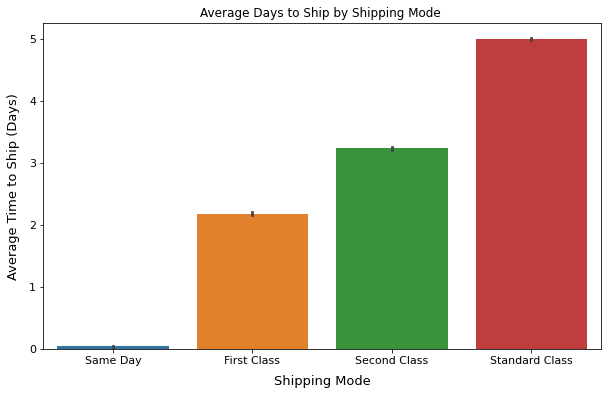

In [57]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Ship Mode', y = 'time_to_ship', data = orders_df, order = ['Same Day', 'First Class', 'Second Class', 'Standard Class'])
plt.xlabel('Shipping Mode', fontdict = {'fontsize':13}, labelpad = 9)
plt.ylabel('Average Time to Ship (Days)', fontdict = {'fontsize':13}, labelpad = 9)
plt.xticks(size = 11)
plt.yticks(size = 11)
plt.title('Average Days to Ship by Shipping Mode ');

In [66]:
orders_df[(orders_df['Ship Mode'] == 'Same Day') & (orders_df['time_to_ship'] != 0)]['Row ID'].count()

101

In [69]:
missed_same_day_df = orders_df[(orders_df['Ship Mode'] == 'Same Day') & (orders_df['time_to_ship'] != 0)]

In [71]:
missed_same_day_df['Market'].value_counts()

US        24
EU        22
LATAM     21
APAC      20
Africa     7
EMEA       7
Name: Market, dtype: int64

In [83]:
missed_same_day_df['Order Date'].dt.day_name().value_counts()

Friday       23
Tuesday      17
Monday       17
Thursday     16
Wednesday    15
Saturday     10
Sunday        3
Name: Order Date, dtype: int64

In [85]:
cal = USFederalHolidayCalendar()

In [86]:
missed_same_day_df['Order Date'].min()

Timestamp('2011-03-28 00:00:00')

In [91]:
us_holidays = cal.holidays(start = missed_same_day_df['Order Date'].min(), end = missed_same_day_df['Order Date'].max())

In [92]:
counter = 0 

for date in missed_same_day_df['Order Date']:
    if date in us_holidays:
        counter += 1

counter

5